# Исследование объявлений о продаже квартир

Необходимо определить рыночную стоимость объектов недвижимости. Задача — установить параметры и построить автоматизированную систему: отследить аномалии и мошенническую деятельность. 

В распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропусков-и-аномалий" data-toc-modified-id="Обработка-пропусков-и-аномалий-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обработка пропусков и аномалий</a></span><ul class="toc-item"><li><span><a href="#Высота-потолков" data-toc-modified-id="Высота-потолков-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Высота потолков</a></span></li><li><span><a href="#Число-этажей-в-доме" data-toc-modified-id="Число-этажей-в-доме-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Число этажей в доме</a></span></li><li><span><a href="#Жилая-площадь-и-площадь-кухни" data-toc-modified-id="Жилая-площадь-и-площадь-кухни-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Жилая площадь и площадь кухни</a></span></li><li><span><a href="#Балконы" data-toc-modified-id="Балконы-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Балконы</a></span></li><li><span><a href="#Населённый-пункт" data-toc-modified-id="Населённый-пункт-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>Населённый пункт</a></span></li><li><span><a href="#Расстояние-до-центра-города" data-toc-modified-id="Расстояние-до-центра-города-2.1.6"><span class="toc-item-num">2.1.6&nbsp;&nbsp;</span>Расстояние до центра города</a></span></li><li><span><a href="#Дни-размещения-объявления" data-toc-modified-id="Дни-размещения-объявления-2.1.7"><span class="toc-item-num">2.1.7&nbsp;&nbsp;</span>Дни размещения объявления</a></span></li><li><span><a href="#Другое" data-toc-modified-id="Другое-2.1.8"><span class="toc-item-num">2.1.8&nbsp;&nbsp;</span>Другое</a></span></li></ul></li><li><span><a href="#Приведение-к-типам-данных" data-toc-modified-id="Приведение-к-типам-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Приведение к типам данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Цена-квадратного-метра-(в-рублях)." data-toc-modified-id="Цена-квадратного-метра-(в-рублях).-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Цена квадратного метра (в рублях).</a></span></li><li><span><a href="#День-недели,-месяц-и-год-публикации-объявления" data-toc-modified-id="День-недели,-месяц-и-год-публикации-объявления-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>День недели, месяц и год публикации объявления</a></span></li><li><span><a href="#Этаж-квартиры" data-toc-modified-id="Этаж-квартиры-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Этаж квартиры</a></span></li><li><span><a href="#Соотношение-жилой-и-общей-площади.-Отношение-площади-кухни-к-общей." data-toc-modified-id="Соотношение-жилой-и-общей-площади.-Отношение-площади-кухни-к-общей.-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Соотношение жилой и общей площади. Отношение площади кухни к общей.</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-различных-параметров." data-toc-modified-id="Изучение-различных-параметров.-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изучение различных параметров.</a></span><ul class="toc-item"><li><span><a href="#Площадь" data-toc-modified-id="Площадь-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Площадь</a></span></li><li><span><a href="#Цена" data-toc-modified-id="Цена-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Цена</a></span></li><li><span><a href="#Число-комнат" data-toc-modified-id="Число-комнат-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Число комнат</a></span></li><li><span><a href="#Высота-потолков" data-toc-modified-id="Высота-потолков-4.1.4"><span class="toc-item-num">4.1.4&nbsp;&nbsp;</span>Высота потолков</a></span></li></ul></li><li><span><a href="#Время-продажи-квартиры" data-toc-modified-id="Время-продажи-квартиры-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Время продажи квартиры</a></span></li><li><span><a href="#Редкие-и-выбивающиеся-значения" data-toc-modified-id="Редкие-и-выбивающиеся-значения-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Редкие и выбивающиеся значения</a></span></li><li><span><a href="#Факторы-влияния-на-стоимость-квартиры" data-toc-modified-id="Факторы-влияния-на-стоимость-квартиры-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Факторы влияния на стоимость квартиры</a></span><ul class="toc-item"><li><span><a href="#Зависимость-цены-от-площади" data-toc-modified-id="Зависимость-цены-от-площади-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Зависимость цены от площади</a></span></li><li><span><a href="#Зависимость-цены-от-числа-комнат" data-toc-modified-id="Зависимость-цены-от-числа-комнат-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>Зависимость цены от числа комнат</a></span></li><li><span><a href="#Зависимость-цены-от-удалённости-от-центра" data-toc-modified-id="Зависимость-цены-от-удалённости-от-центра-4.4.3"><span class="toc-item-num">4.4.3&nbsp;&nbsp;</span>Зависимость цены от удалённости от центра</a></span></li><li><span><a href="#Зависимость-цены-от-этажа" data-toc-modified-id="Зависимость-цены-от-этажа-4.4.4"><span class="toc-item-num">4.4.4&nbsp;&nbsp;</span>Зависимость цены от этажа</a></span></li><li><span><a href="#Зависимость-цены-от-даты-размещения" data-toc-modified-id="Зависимость-цены-от-даты-размещения-4.4.5"><span class="toc-item-num">4.4.5&nbsp;&nbsp;</span>Зависимость цены от даты размещения</a></span></li></ul></li><li><span><a href="#10-населённых-пунктов-с-наибольшим-числом-объявлений" data-toc-modified-id="10-населённых-пунктов-с-наибольшим-числом-объявлений-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>10 населённых пунктов с наибольшим числом объявлений</a></span></li><li><span><a href="#Центральная-зона" data-toc-modified-id="Центральная-зона-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Центральная зона</a></span></li><li><span><a href="#Cегмент-квартир-в-центре" data-toc-modified-id="Cегмент-квартир-в-центре-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Cегмент квартир в центре</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Изучение данных из файла

Прочитаем файл real_estate_data.csv и сохраним его в переменной *estate*. Получим первые 10 строк таблицы.

In [155]:
import pandas as pd

estate = pd.read_csv('/datasets/real_estate_data.csv', sep ='\t')
pd.set_option('display.max_columns', 22) 
estate.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Получим общую информацию о данных таблицы *estate*.

In [156]:
estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Рассмотрим полученную информацию поподробнее.

Всего в *estate* 23699 строк и 22 столбца с типами данных bool(2), float64(14), int64(3), object(3):
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах(м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

Количество значений в столбцах *ceiling_height*, *floors_total*, *living_area*, *is_apartment*, *kitchen_area*, *balcony*, *locality_name*, *airports_nearest*, *cityCenters_nearest*, *parks_around3000*, *parks_nearest*, *ponds_around3000*, *ponds_nearest* и *days_exposition*  различается. Это говорит о том, что в данных есть пропущенные значения.

### Вывод

Для дальнейшего исследования необходимо избавиться от пропусков в данных, где это является возможным.

## Предобработка данных

### Обработка пропусков и аномалий

Проверим данные на наличие пропусков вызовом набора методов для суммирования пропущенных значений.

In [157]:
# <суммарное количество пропусков, выявленных методом isnull() в таблице estate>
print(estate.isnull().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


Изучим столбцы с пропусками поподробнее. 

#### Высота потолков

Пропуски в значениях возникли скорее всего из-за того, что пользователь не знал, какова высота потолков.

C помощью метода describe() просмотрим числовое описание данных для столбца.

In [158]:
estate['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Минимальное значение высоты потолков - 1 м, максимальное - 100 м. Это говорит об аномальных данных, выбросах.
Потолки это довольно стандартизированная величина, заменим пропущенные значения медианой, так как медиана устойчива к выбросам.

In [159]:
estate['ceiling_height'] = estate['ceiling_height'].fillna(estate['ceiling_height'].median())
print('Число пропусков:',estate['ceiling_height'].isnull().sum())

Число пропусков: 0


####  Число этажей в доме

Данных пропусков немного, скорее всего они возникли из-за невнимательности пользователя при заполнении. Подходящие значения для замены найти не получится, поэтому оставим данные строки без изменения.

#### Жилая площадь и площадь кухни 

Данные пропуски могли возникнуть из-за того, что пользователь просто не знает / не помнит эти значения, поэтому оставил пустыми данные категории.

Создадим новый столбец *living_part* со долями жилой площади от обшей площади квартиры. Посчитаем среднюю долю из всех непропущеннных значений. Заполним пропущенные значения в *living_area*, умножив значение *total_area* на найденную среднюю долю.

In [160]:
estate['living_part'] = estate['living_area'] / estate['total_area']
living_part_mean = estate['living_part'].dropna().mean()
print('Средняя доля жилой площади от общей:', living_part_mean)

estate['living_area'] = estate['living_area'].fillna(estate['total_area'] * living_part_mean)
estate.drop('living_part', axis=1, inplace=True)
print(estate['living_area'])
print('Число пропусков:', estate['living_area'].isnull().sum())

Средняя доля жилой площади от общей: 0.5647655216993234
0        51.000000
1        18.600000
2        34.300000
3        89.797718
4        32.000000
           ...    
23694    73.300000
23695    38.000000
23696    29.700000
23697    43.345754
23698    12.300000
Name: living_area, Length: 23699, dtype: float64
Число пропусков: 0


Создадим новый столбец *kitchen_part* с долями площади кухни от обшей площади квартиры. Посчитаем среднюю долю из всех непропущеннных значений. Заполним пропущенные значения в *kitchen_area*, умножив значение *total_area* на найденную среднюю долю.

In [161]:
estate['kitchen_part'] = estate['kitchen_area'] / estate['total_area']
kitchen_part_mean = estate['kitchen_part'].dropna().mean()
print('Средняя доля жилой площади от общей:', kitchen_part_mean)

estate['kitchen_area'] = estate['kitchen_area'].fillna(estate['total_area'] * kitchen_part_mean)
estate.drop('kitchen_part', axis=1, inplace=True)
print(estate['kitchen_area'])
print('Число пропусков:', estate['kitchen_area'].isnull().sum())

Средняя доля жилой площади от общей: 0.18735473877174058
0        25.000000
1        11.000000
2         8.300000
3        29.789403
4        41.000000
           ...    
23694    13.830000
23695     8.500000
23696    10.623014
23697    23.300000
23698     9.000000
Name: kitchen_area, Length: 23699, dtype: float64
Число пропусков: 0


#### Балконы

Пропуски в значениях могли возникнуть из-за того, что пользователи, у которых нет балконов, не стали ничего указывать, поэтому заменим все пропущенные значения на нули.

In [162]:
estate['balcony'] = estate['balcony'].fillna(0)
print('Число пропусков:',estate['balcony'].isnull().sum())

Число пропусков: 0


#### Населённый пункт

Данных пропусков немного, скорее всего они возникли из-за невнимательности пользователя при заполнении. Подходящие значения для замены найти не получится, поэтому данные строки придётся удалить. Мы не можем быть уверены, что эти квартиры принадлежат Лен. области.

In [163]:
estate.dropna(subset = ['locality_name'], inplace = True)
print('Число пропусков:',estate['locality_name'].isnull().sum())

Число пропусков: 0


#### Расстояние до центра города

В этом случае нет подходящего значения на замену. Оставим эти значения пустыми. 

#### Дни размещения объявления

Заменим пропуски на нули.

In [164]:
estate['days_exposition'] = estate['days_exposition'].fillna(0)
print('Число пропусков:',estate['days_exposition'].isnull().sum())

Число пропусков: 0


#### Другое

Все остальные столбцы с пропусками не влияют на дальнейший анализ, поэтому оставим их без изменений.

### Приведение к типам данных

Заменим типы столбцов цены на момент снятия с публикации, количества этажей, количества балконов и дней размещения объявления с float на int (так как данные значения должны быть целыми). Так же заменим тип столбца даты публикации со строчного на временной (отбросив время, так как оно везде 0:00:00).

In [165]:
estate[[
    'last_price', 'balcony', 'days_exposition']] = estate[[
    'last_price','balcony',  'days_exposition'
]].astype('int')

estate['first_day_exposition'] = pd.to_datetime(estate['first_day_exposition'], format = '%Y-%m-%d')
estate.dtypes

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                    object
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                  int64
dtype: object

### Вывод

Пропущенные значения могут привести к неверному анализу данных. Некоторые значения можно попытаться заменить на среднее или медиану, некоторые вполне могут быть заменены на нули. Для некоторых данные нет подходящей замены, поэтому такие строки убираются либо остаются без изменений. 
Так же в столбцах, в которых нет пропусков и значения в которых должны быть целыми, должен быть заменен тип данных с float на int.

## Расчёты и добавление результатов в таблицу

### Цена квадратного метра (в рублях).

In [166]:
estate['price_sq_m'] = estate['last_price'] / estate['total_area']
print(estate['price_sq_m'].head())

0    120370.370370
1     82920.792079
2     92785.714286
3    408176.100629
4    100000.000000
Name: price_sq_m, dtype: float64


### День недели, месяц и год публикации объявления

In [167]:
estate['weekday_exposition'] = estate['first_day_exposition'].dt.weekday_name
estate['month_exposition'] = estate['first_day_exposition'].dt.month
estate['year_exposition'] = estate['first_day_exposition'].dt.year
print(estate.loc[:, 'weekday_exposition':'year_exposition'].head())

  weekday_exposition  month_exposition  year_exposition
0           Thursday                 3             2019
1            Tuesday                12             2018
2           Thursday                 8             2015
3             Friday                 7             2015
4            Tuesday                 6             2018


### Этаж квартиры

Варианты - первый, последний, другой и ошибка (в случае, если таж рассматриваемой квартиры выше общего их числа в доме).

In [168]:
def which_floor(floor, floors_total):
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
    else:
        return 'ошибка'

In [169]:
estate['which_floor'] = estate.apply(lambda x: which_floor(x['floor'], x['floors_total']), axis = 1)
print(estate.loc[:, ['floor', 'floors_total', 'which_floor']].head(15))

    floor  floors_total which_floor
0       8          16.0      другой
1       1          11.0      первый
2       4           5.0      другой
3       9          14.0      другой
4      13          14.0      другой
5       5          12.0      другой
6       6          26.0      другой
7      22          24.0      другой
8      26          27.0      другой
9       7           9.0      другой
10      3          12.0      другой
11      4           5.0      другой
12      5           5.0   последний
13      5           5.0   последний
14      1           6.0      первый


Проверим, есть ли ошибка в записи этажа.

In [170]:
estate.query('which_floor == "ошибка"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sq_m,weekday_exposition,month_exposition,year_exposition,which_floor
186,12,11640000,65.20,2018-10-02,2,2.65,NaN,30.800000,4,NaN,False,...,12373.0,1.0,123.0,0.0,NaN,49,178527.607362,Tuesday,10,2018,ошибка
457,4,9788348,70.80,2015-08-01,2,2.65,NaN,38.400000,12,NaN,False,...,8322.0,2.0,309.0,2.0,706.0,727,138253.502825,Saturday,8,2015,ошибка
671,4,6051191,93.60,2017-04-06,3,2.65,NaN,47.100000,8,NaN,False,...,17369.0,0.0,NaN,1.0,374.0,123,64649.476496,Thursday,4,2017,ошибка
1757,5,3600000,39.00,2017-04-22,1,2.65,NaN,22.025855,9,NaN,False,...,11618.0,1.0,835.0,1.0,652.0,77,92307.692308,Saturday,4,2017,ошибка
1930,1,9750000,66.77,2016-05-13,2,2.65,NaN,37.709394,4,NaN,False,...,10660.0,1.0,2276.0,3.0,244.0,90,146023.663322,Friday,5,2016,ошибка
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000,63.50,2017-05-24,2,2.80,NaN,35.862611,3,NaN,False,...,15363.0,0.0,NaN,1.0,853.0,512,133858.267717,Wednesday,5,2017,ошибка
22656,4,4574160,64.50,2017-04-02,2,2.65,NaN,31.700000,20,NaN,False,...,17369.0,0.0,NaN,1.0,374.0,127,70917.209302,Sunday,4,2017,ошибка
22808,0,14569263,110.40,2016-11-20,3,2.65,NaN,45.380000,6,NaN,False,...,4529.0,0.0,NaN,0.0,NaN,260,131967.961957,Sunday,11,2016,ошибка
23590,0,21187872,123.30,2017-04-25,3,2.65,NaN,50.400000,18,NaN,False,...,4529.0,0.0,NaN,0.0,NaN,104,171840.000000,Tuesday,4,2017,ошибка


Ошибок нет.

### Соотношение жилой и общей площади. Отношение площади кухни к общей.

In [171]:
estate['living_part'] = estate['living_area'] / estate['total_area']
estate['kitchen_part'] = estate['kitchen_area'] / estate['total_area']
print(estate.loc[:, ['living_part', 'kitchen_part']].head(10))

   living_part  kitchen_part
0     0.472222      0.231481
1     0.460396      0.272277
2     0.612500      0.148214
3     0.564766      0.187355
4     0.320000      0.410000
5     0.473684      0.299342
6     0.284182      0.386059
7     0.564766      0.263966
8     0.465320      0.265682
9     0.714754      0.106557


## Исследовательский анализ данных

### Изучение различных параметров.

#### Площадь

Числовое описание данных.

In [172]:
estate['total_area'].describe()

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

Построим гистограмму.

In [174]:
import matplotlib.pyplot as plt

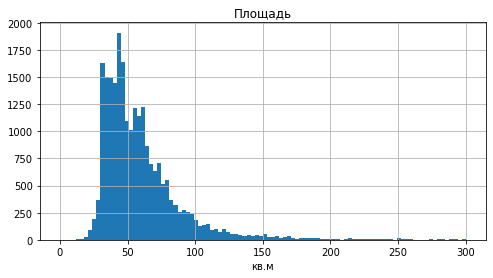

In [175]:
estate['total_area'].hist(bins = 100, range = (0, 300), figsize = (8,4), grid = True)
plt.title('Площадь')
plt.xlabel('кв.м')
plt.show()

Площадь квартир в среднем равна 60 квадратным метрам. Медиана - 52 кв.м. 

Создадим функцию для подсчёта межквартильного размаха, левого и правого "усов".

In [176]:
def whiskers(column):
    description = estate[column].describe()
    #межквартильный размах
    iqr = round(description[6] - description[4], 2)
    #левый "ус"
    left_whisker = round(description[4] - iqr * 1.5, 2)
    if left_whisker < description[3]:
        left_whisker = round(description[3], 2)
    #правый "ус"
    right_whisker = round(description[6] + iqr * 1.5, 2)
    if right_whisker > description[7]:
        right_whisker = round(description[7], 2)
        
    print('Межквартильный размах:', iqr)
    print('Левый "ус":', left_whisker)
    print('Правый "ус"', right_whisker)

Посчитаем межквартильный размах, левый "ус" и правый "ус".

In [177]:
whiskers('total_area')

Межквартильный размах: 29.7
Левый "ус": 12.0
Правый "ус" 114.25


Построим диаграмму размаха.

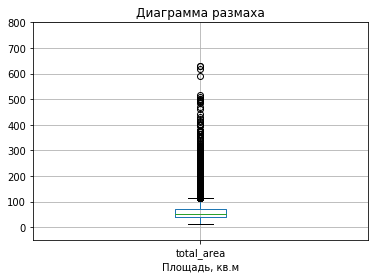

In [178]:
import matplotlib.pyplot as plt
estate.boxplot('total_area') 
plt.title('Диаграмма размаха')
plt.xlabel('Площадь, кв.м')
plt.ylim(-50, 800)
plt.show()

Нижний «ус» упирается в минимальное значение - 12. Верхний заканчивается на 114,25 кв.м. — это 1.5 межквартильного размаха, добавленного к 3-му квартилю. Концентрация значений после него довольна велика, поэтому аномальными будем считать значения, которые больше 550 кв.м (судя по диаграмме размаха).

Создадим столбец с булевыми значениями, где False - это нормальная площадь, а True - аномальная.

In [179]:
estate['anomalistic_area'] = estate['total_area'] > 550
print(estate['anomalistic_area'].head())

0    False
1    False
2    False
3    False
4    False
Name: anomalistic_area, dtype: bool


#### Цена

Переведём цены в миллионы.

In [180]:
estate['last_price'] = estate['last_price'] / 1000000

Числовое описание данных.

In [181]:
estate['last_price'].describe()

count    23650.000000
mean         6.541127
std         10.896399
min          0.012190
25%          3.400000
50%          4.650000
75%          6.799000
max        763.000000
Name: last_price, dtype: float64

Построим гистограмму.

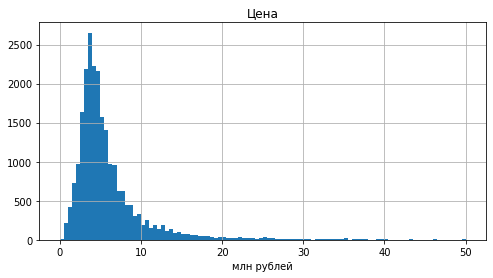

In [182]:
estate['last_price'].hist(bins = 100, range = (0, 50), figsize = (8,4), grid = True)
plt.title('Цена')
plt.xlabel('млн рублей')
plt.show()

В среднем цена квартиры равна 6,5 миллионов.  Медиана - 4,646 миллионов. 

Посчитаем межквартильный размах, левый "ус" и правый "ус".

In [183]:
whiskers('last_price')

Межквартильный размах: 3.4
Левый "ус": 0.01
Правый "ус" 11.9


Диаграмма размаха.

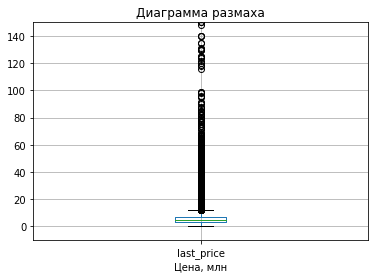

In [184]:
import matplotlib.pyplot as plt
estate.boxplot('last_price') 
plt.title('Диаграмма размаха')
plt.xlabel('Цена, млн')
plt.ylim(-10, 150)
plt.show()

Нижний «ус» упирается в минимальное значение - 12190 рублей. Верхний заканчивается на 11.8 млн рублей. Концентрация значений после него довольна велика, поэтому аномальными будем считать значения, которые больше 100 млн (судя по диаграмме размаха). Так же за минимальное значение возьмём 1 млн рублей, так как малвероятно, что квартира стоит дешевле.

Создадим столбец с булевыми значениями, где False - это нормальная цена, а True - аномальная.

In [185]:
estate['anomalistic_price'] = (estate['last_price'] > 100) | (estate['last_price'] < 1)
print(estate['anomalistic_price'].head())

0    False
1    False
2    False
3    False
4    False
Name: anomalistic_price, dtype: bool


#### Число комнат

Числовое описание данных.

In [186]:
estate['rooms'].describe()

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Построим гистограмму.

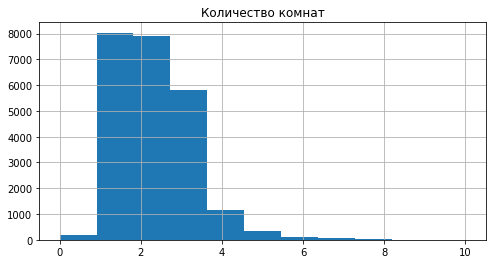

In [187]:
estate['rooms'].hist(bins = 11, range = (0, 10), figsize = (8,4), grid = True)
plt.title('Количество комнат')
plt.show()

Среднее количество комнат в квартирах, как и медиана, равно 2. Количество комнат в основном - от 1 до 6.

Посчитаем межквартильный размах, левый "ус" и правый "ус".

In [188]:
whiskers('rooms')

Межквартильный размах: 2.0
Левый "ус": 0.0
Правый "ус" 6.0


Диаграмма размаха.

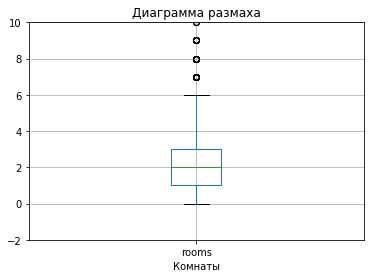

In [189]:
import matplotlib.pyplot as plt
estate.boxplot('rooms') 
plt.title('Диаграмма размаха')
plt.xlabel('Комнаты')
plt.ylim(-2, 10)
plt.show()

Есть выбросы больше 6, вплоть до 19 (аномалии) и есть количество комнат, равное 0, что скорее всего свидетельствует о студии или об открытой планировке.

Создадим столбец с булевыми значениями, где False - это нормальным количеством комнат, а True - аномальным.

In [190]:
estate['anomalistic_rooms'] = estate['rooms'] > 6
print(estate['anomalistic_rooms'].head())

0    False
1    False
2    False
3    False
4    False
Name: anomalistic_rooms, dtype: bool


#### Высота потолков

Числовое описание данных.

In [191]:
estate['ceiling_height'].describe()

count    23650.000000
mean         2.724311
std          0.989255
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Построим гистограмму.

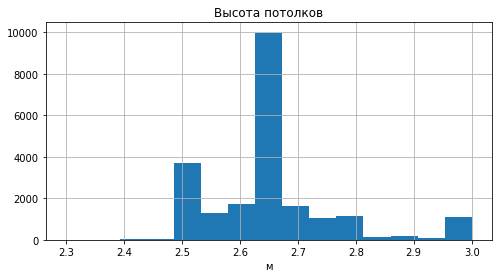

In [192]:
estate['ceiling_height'].hist(bins = 15, range = (2.3, 3), figsize = (8,4), grid = True)
plt.title('Высота потолков')
plt.xlabel('м')
plt.show()

Наибольшее количество высот потолков имеет высоту 2,65 м. 

Посчитаем межквартильный размах, левый "ус" и правый "ус".

In [193]:
whiskers('ceiling_height')

Межквартильный размах: 0.1
Левый "ус": 2.45
Правый "ус" 2.85


Диаграмма размаха.

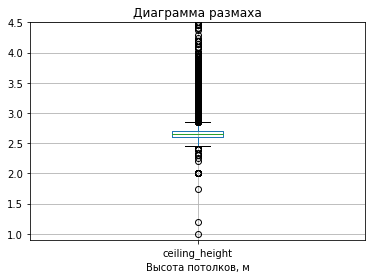

In [194]:
import matplotlib.pyplot as plt
estate.boxplot('ceiling_height') 
plt.title('Диаграмма размаха')
plt.xlabel('Высота потолков, м')
plt.ylim(0.9, 4.5)
plt.show()

В целом высота варьируется от 2.45 м до 4 м. Всё, что находится за пределами данных, является аномалией.

Создадим столбец с булевыми значениями, где False - это значения с нормальной высотой потолков, а True - аномальной.

In [195]:
estate['anomalistic_height'] = (2.45 > estate['ceiling_height']) | (estate['ceiling_height'] > 4)
print(estate['anomalistic_height'].head())

0    False
1    False
2    False
3    False
4    False
Name: anomalistic_height, dtype: bool


### Время продажи квартиры

Числовое описание данных.

In [196]:
estate['days_exposition'].describe()

count    23650.000000
mean       156.448964
std        213.564548
min          0.000000
25%         22.000000
50%         73.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

Построим гистограмму.

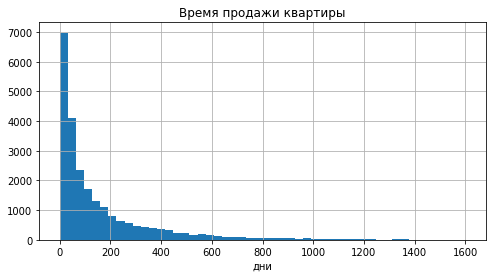

In [197]:
estate['days_exposition'].hist(bins = 50, range = (0, 1600), figsize = (8,4), grid = True)
plt.title('Время продажи квартиры')
plt.xlabel('дни')
plt.show()

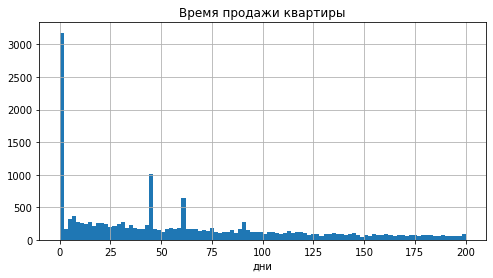

In [198]:
estate['days_exposition'].hist(bins = 100, range = (0, 200), figsize = (8,4), grid = True)
plt.title('Время продажи квартиры')
plt.xlabel('дни')
plt.show()

Среднее время продажи - 156 дней. Медианное время продажи - 73 дня. Среднее почти в 2 раза больше медианы, значит, очень длинные сделки оказывают своё влияние. 

Посчитаем межквартильный размах, левый "ус" и правый "ус".

In [199]:
whiskers('days_exposition')

Межквартильный размах: 176.0
Левый "ус": 0.0
Правый "ус" 462.0


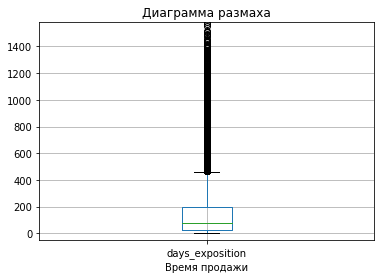

In [200]:
import matplotlib.pyplot as plt
estate.boxplot('days_exposition') 
plt.title('Диаграмма размаха')
plt.xlabel('Время продажи')
plt.ylim(-50, 1580)
plt.show()

Продажи, которые длились больше, чем 427 дней, могут считататься аномально долгими.

Создадим столбец с булевыми значениями, где False - это нормальное время продажи, а True - аномальное.

In [201]:
estate['anomalistic_days'] = estate['days_exposition'] > 427
print(estate['anomalistic_days'].head())

0    False
1    False
2     True
3    False
4    False
Name: anomalistic_days, dtype: bool


### Редкие и выбивающиеся значения

Уберём аномальные значения, которые были записаны в специальные столбцы в предыдущих пунктах.

In [202]:
good_estate = estate[(estate['anomalistic_area'] == False) & (estate['anomalistic_price'] == False) &
     (estate['anomalistic_rooms'] == False) & (estate['anomalistic_height'] == False) &
     (estate['anomalistic_days'] == False)].reset_index(drop=True)

print(good_estate.head(10))
print(good_estate.shape)

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20      13.000      108.00           2019-03-07      3   
1             7       3.350       40.40           2018-12-04      1   
2             0      64.900      159.00           2015-07-24      3   
3             2      10.000      100.00           2018-06-19      2   
4            10       2.890       30.40           2018-09-10      1   
5             6       3.700       37.30           2017-11-02      1   
6             5       7.915       71.60           2019-04-18      2   
7            20       2.900       33.16           2018-05-23      1   
8            18       5.400       61.00           2017-02-26      3   
9             5       5.050       39.60           2017-11-16      1   

   ceiling_height  floors_total  living_area  floor is_apartment  studio  ...  \
0            2.70          16.0    51.000000      8          NaN   False  ...   
1            2.65          11.0    18.600000      1     

Из 23699 осталось 20899 строчек. Посчитаем процент аномальных значений.

In [203]:
print('Процент строк с аномальными значениями:', round(100 - 21152 * 100 / 23699, 2), '%')

Процент строк с аномальными значениями: 10.75 %


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc919b4c510>,
      dtype=object)

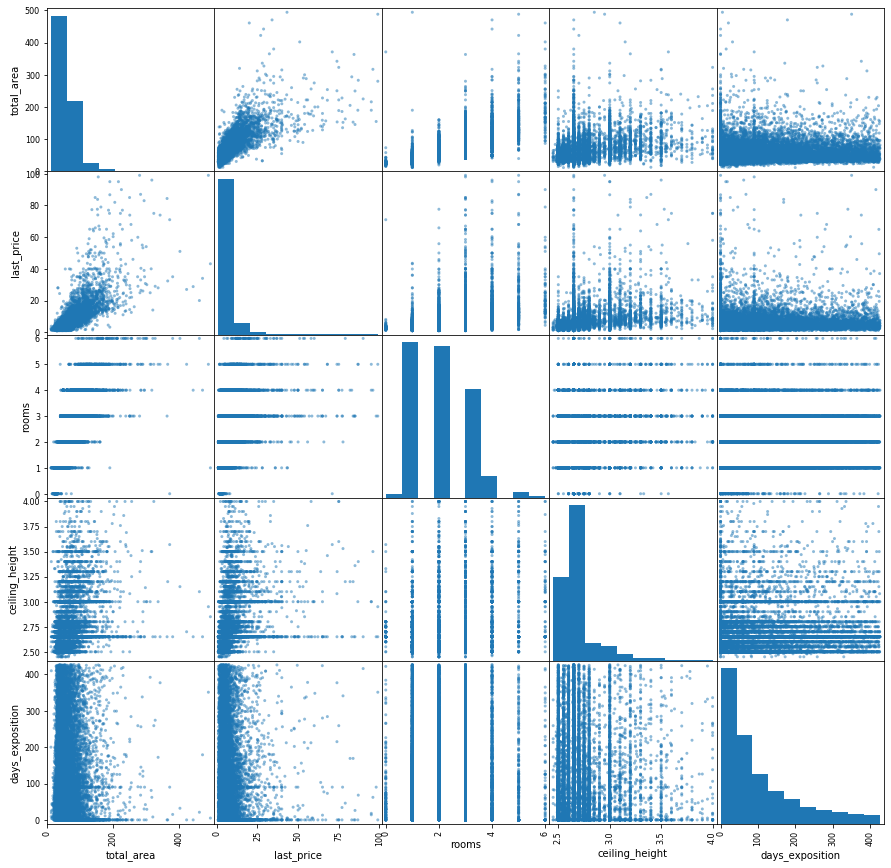

In [204]:
pd.plotting.scatter_matrix(good_estate.loc[:, ['total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition']], 
                           figsize = (15,15))

### Факторы влияния на стоимость квартиры

#### Зависимость цены от площади

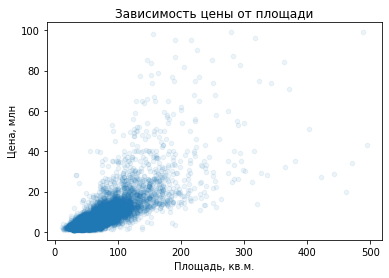

In [206]:
good_estate.plot(x='total_area', y='last_price', kind='scatter', alpha=0.08) 
plt.title('Зависимость цены от площади')
plt.xlabel('Площадь, кв.м.')
plt.ylabel('Цена, млн')
plt.show()

In [207]:
good_estate['last_price'].corr(good_estate['total_area'])

0.7551819516193043

Корреляция в 0.755 говорит о наличии связи (средней) между ценой и площадью квартиры: чем больше площадь, тем выше цена. 

####  Зависимость цены от числа комнат

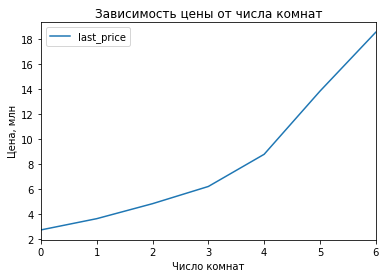

In [208]:
good_estate.pivot_table(index = 'rooms', values = 'last_price', aggfunc = 'median').plot() 
plt.title('Зависимость цены от числа комнат')
plt.xlabel('Число комнат')
plt.ylabel('Цена, млн')
plt.show()

In [209]:
good_estate['last_price'].corr(good_estate['rooms'])

0.4405101005792691

Связь между ценой и количеством комнат довольно слабая. При грубой оценке можно сказать, что чем меньше комнат, тем меньше цена.

####  Зависимость цены от удалённости от центра

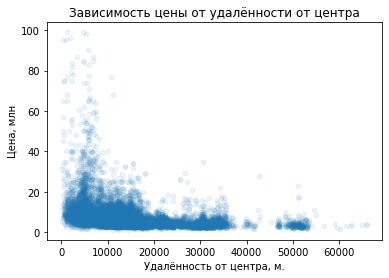

In [210]:
good_estate.plot(x='cityCenters_nearest', y='last_price', kind='scatter', alpha=0.08) 
plt.title('Зависимость цены от удалённости от центра')
plt.xlabel('Удалённость от центра, м.')
plt.ylabel('Цена, млн')
plt.show()

In [211]:
good_estate['last_price'].corr(good_estate['cityCenters_nearest'])

-0.2967231052499682

Зависимость между ценой и удалённостью от центра слабая, но при грубой оценке можно сказать, что чем дальше от центра, тем меньше стоимость.

####  Зависимость цены от этажа

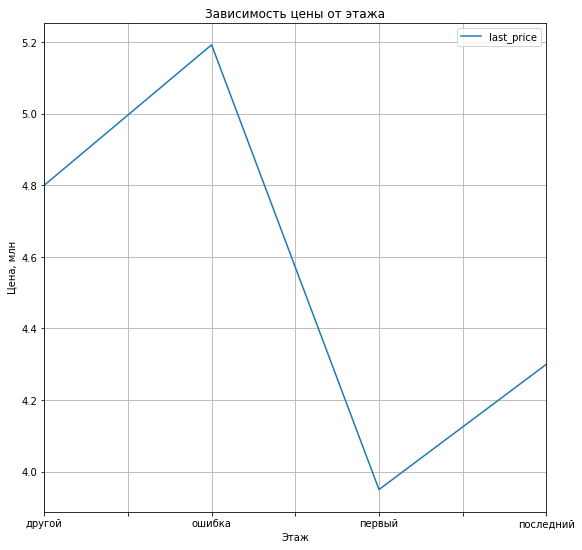

In [212]:
good_estate.pivot_table(index= 'which_floor', values = 'last_price', aggfunc = 'median').plot(grid = True, figsize = (9,9))
plt.title('Зависимость цены от этажа')
plt.xlabel('Этаж')
plt.ylabel('Цена, млн')
plt.show()

Цена квартир на первом этаже и на последнем меньше, чем на других этажах.

####  Зависимость цены от даты размещения

Зависимость цены от дня недели размещения.

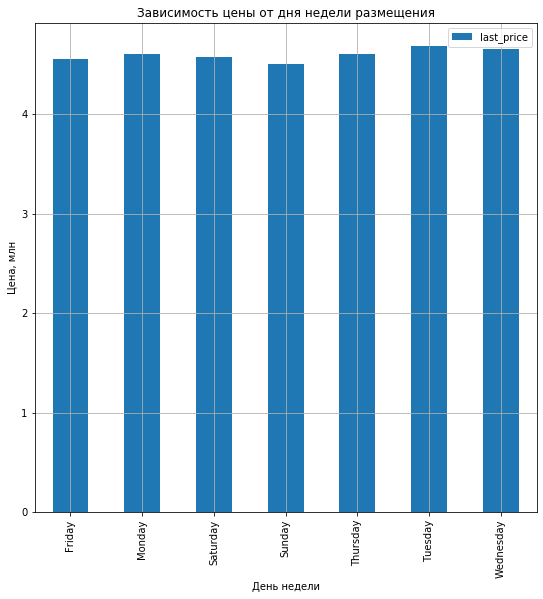

In [213]:
good_estate.pivot_table(index= 'weekday_exposition', values = 'last_price', aggfunc = 'median').plot(kind = 'bar', grid = True, figsize = (9,9))
plt.title('Зависимость цены от дня недели размещения')
plt.xlabel('День недели')
plt.ylabel('Цена, млн')
plt.show()

Зависимость цены от месяца размещения.

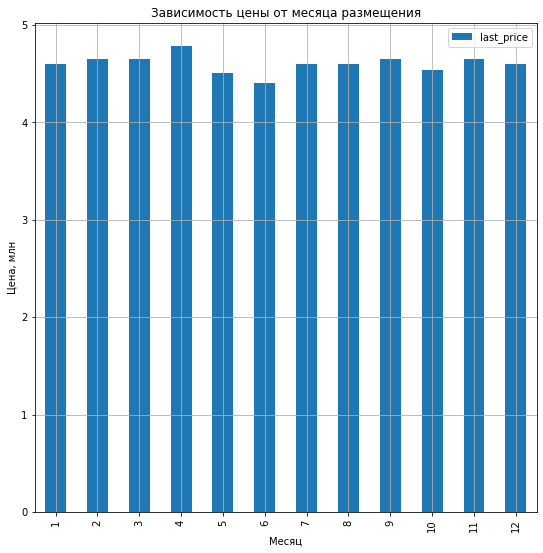

In [214]:
good_estate.pivot_table(index= 'month_exposition', values = 'last_price', aggfunc = 'median').plot(kind = 'bar', grid = True, figsize = (9,9))
plt.title('Зависимость цены от месяца размещения')
plt.xlabel('Месяц')
plt.ylabel('Цена, млн')
plt.show()

Зависимость цены от года размещения.

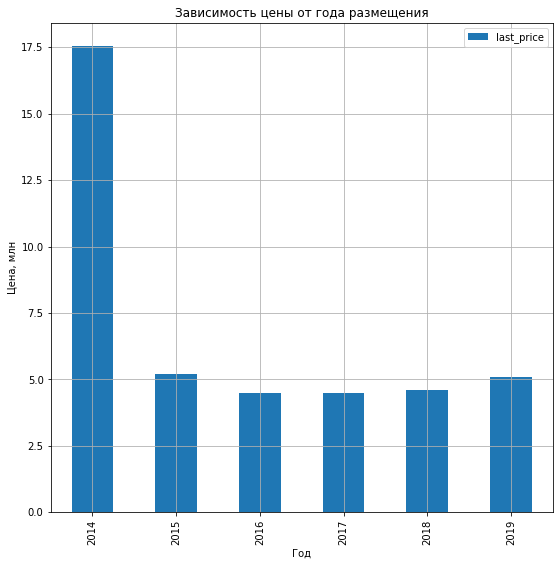

In [215]:
good_estate.pivot_table(index= 'year_exposition', values = 'last_price', aggfunc = 'median').plot(kind = 'bar', grid = True, figsize = (9,9))
plt.title('Зависимость цены от года размещения')
plt.xlabel('Год')
plt.ylabel('Цена, млн')
plt.show()

* Цена не зависит от дня недели размещения публикации.
* Цена почти не заивисит от месяца размещения публикации, есть небольшой скачок в апреле.
* Цена в 2014 году была максимальной. Потом до 2017 года включительно цена пошла на спад, а после начала возрастать.

### 10 населённых пунктов с наибольшим числом объявлений

Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. 

In [216]:
estate_grouped = good_estate.pivot_table(
    index='locality_name', values='price_sq_m', aggfunc=['count', 'mean']
)
estate_grouped.columns = ['count', 'mean_price_sq_m']
estate_grouped = estate_grouped.sort_values(by = 'count', ascending = False)
print(estate_grouped.head(10))

                   count  mean_price_sq_m
locality_name                            
Санкт-Петербург    13955    113104.784851
посёлок Мурино       478     85984.655638
посёлок Шушары       407     78762.214162
Всеволожск           353     69052.579859
Пушкин               329    102776.452415
Колпино              314     75303.647980
посёлок Парголово    300     89859.977964
Гатчина              271     69229.216316
деревня Кудрово      263     92694.813096
Выборг               207     58918.811091


Санкт-Петербург - населенный пункт с наибольшим количеством объявлений и наибольшей средней ценой за квартиру из 10 самых популярных населенных пунктов. Выборг - населенный пункт с наименьшей средней ценой из этих 10-ти.

### Центральная зона

Выделим квартиры в Санкт-Петербурге. Создадим столбец с расстоянием до центра в километрах. Посчитаем среднюю цену для каждого километра. Построим график: как цена зависит от удалённости от центра. 

                        mean_price
cityCenters_nearest_km            
0.0                      26.136175
1.0                      16.257014
2.0                      14.210249
3.0                      10.355344
4.0                      11.006776
5.0                      12.525862
6.0                      12.805405
7.0                      12.592959
8.0                       8.991113
9.0                       6.985715
10.0                      6.329092
11.0                      6.192215
12.0                      5.782041
13.0                      6.076291
14.0                      5.597348
15.0                      5.872189
16.0                      5.376761
17.0                      5.206410
18.0                      5.110875
19.0                      5.027680
20.0                      6.025495
21.0                      5.490866
22.0                      5.452615
23.0                      4.938922
24.0                      3.835887
25.0                      4.052840
26.0                

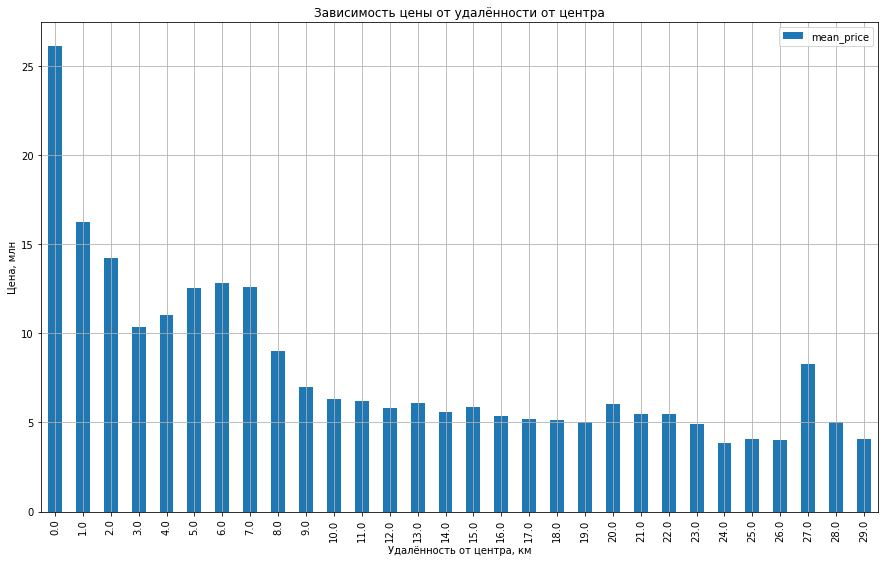

In [217]:
spb_estate = good_estate.query('locality_name == "Санкт-Петербург"').copy()
spb_estate['cityCenters_nearest_km'] = (spb_estate['cityCenters_nearest'] / 1000).round(0)
spb_estate_mean = spb_estate.pivot_table(index = 'cityCenters_nearest_km', values = 'last_price',aggfunc = 'mean')
spb_estate_mean.columns = ['mean_price']
print(spb_estate_mean)
spb_estate_mean.plot(kind = 'bar',figsize = (15,9),grid=True)
plt.title('Зависимость цены от удалённости от центра')
plt.xlabel('Удалённость от центра, км')
plt.ylabel('Цена, млн')
plt.show()

Судя по графику центр Санкт-Петербурга составляет радиус равный 3 км.

### Cегмент квартир в центре

Выделим сегмент квартир в центре. Изучим следующие параметры: площадь, цена, число комнат, высота потолков. 

In [218]:
spb_centre = spb_estate.query('cityCenters_nearest_km <= 8').copy()

total_area
count    3376.000000
mean       83.649902
std        45.391575
min        12.000000
25%        53.275000
50%        73.900000
75%       100.000000
max       494.100000
Name: total_area, dtype: float64
last_price
count    3376.000000
mean       11.970256
std        10.970375
min         1.600000
25%         6.227500
50%         8.570000
75%        13.000000
max        99.000000
Name: last_price, dtype: float64
rooms
count    3376.000000
mean        2.608709
std         1.168995
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         6.000000
Name: rooms, dtype: float64
ceiling_height
count    3376.000000
mean        2.891019
std         0.316465
min         2.460000
25%         2.650000
50%         2.750000
75%         3.100000
max         4.000000
Name: ceiling_height, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc91b7208d0>,
      dtype=object)

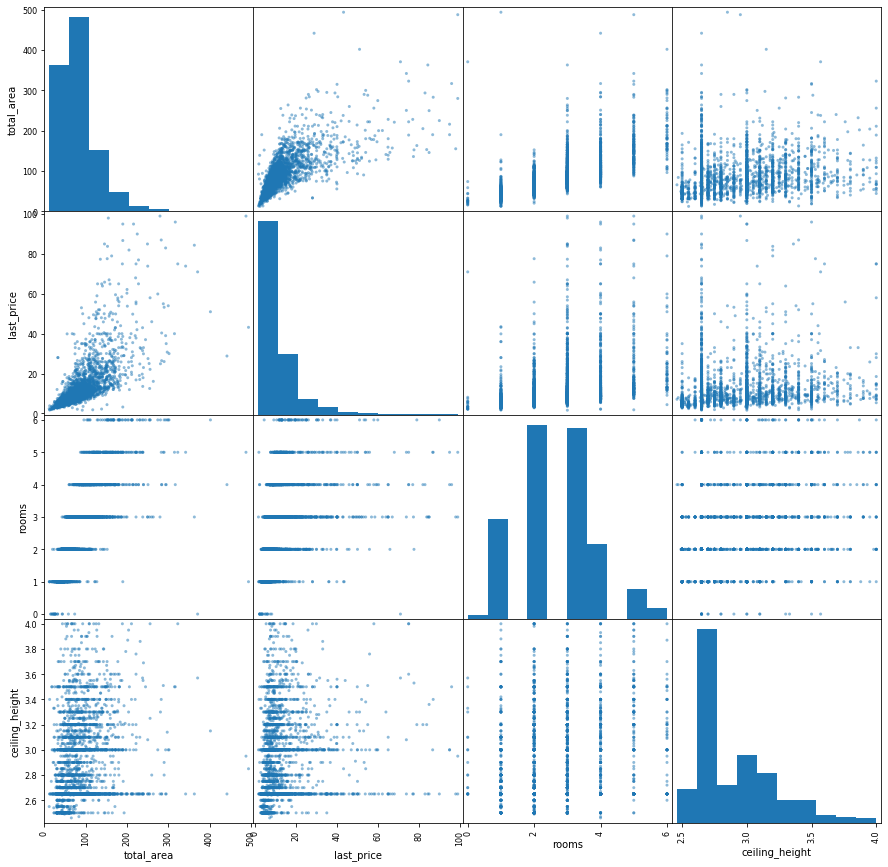

In [219]:
for column in ['total_area', 'last_price', 'rooms', 'ceiling_height']:
    print(column)
    print(spb_centre[column].describe())
pd.plotting.scatter_matrix(spb_centre.loc[:, ['total_area', 'last_price', 'rooms', 'ceiling_height']], 
                           figsize = (15,15))

На основе данных графиков можно сделать выводы:
* Квартир площадью до 50 кв.м стало немного меньше в центре
* Цены на квартиры в центре возросли.
* В центре меньше 1-комнтаных квартир, но больше 2-комнтаных.
* Высота потолков в центре и в целом примерно одинаковая.

Выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

**Число комнат**

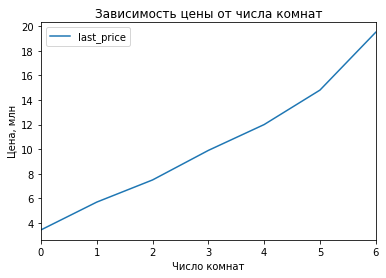

In [220]:
spb_centre.pivot_table(index = 'rooms', values = 'last_price', aggfunc = 'median').plot() 
plt.title('Зависимость цены от числа комнат')
plt.xlabel('Число комнат')
plt.ylabel('Цена, млн')
plt.show()

Зависимость цены от числа комнат осталась примерно той же. Только теперь после 5 комнат график идёт немного на спад.

**Удалённость от центра**

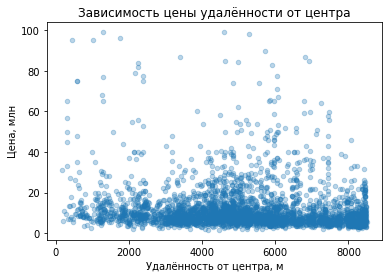

In [221]:
spb_centre.plot(x='cityCenters_nearest', y='last_price', kind='scatter', alpha=0.3) 
plt.title('Зависимость цены удалённости от центра')
plt.xlabel('Удалённость от центра, м')
plt.ylabel('Цена, млн')
plt.show()

Так как мы и так смотрим выборку по центру, никакой особой зависимости не выявлено.

**Дата размещения объявления**

*День недели*

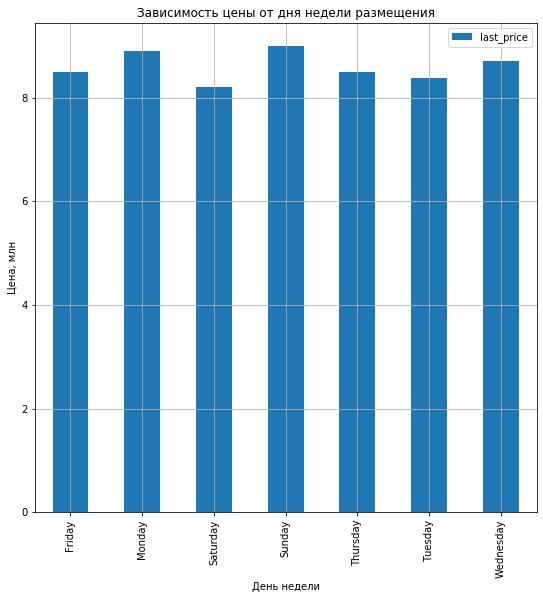

In [222]:
spb_centre.pivot_table(index= 'weekday_exposition', values = 'last_price', aggfunc = 'median').plot(kind = 'bar', grid = True, figsize = (9,9))
plt.title('Зависимость цены от дня недели размещения')
plt.xlabel('День недели')
plt.ylabel('Цена, млн')
plt.show()

В выборке по центре лидирует воскресение по цене, но не сильно.

*Месяц*

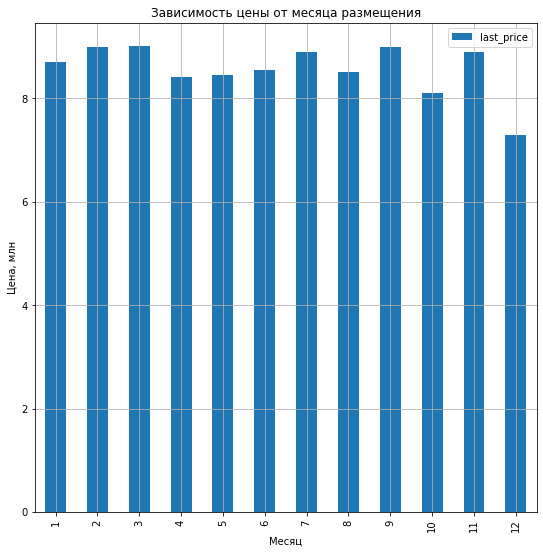

In [223]:
spb_centre.pivot_table(index= 'month_exposition', values = 'last_price', aggfunc = 'median').plot(kind = 'bar', grid = True, figsize = (9,9))
plt.title('Зависимость цены от месяца размещения')
plt.xlabel('Месяц')
plt.ylabel('Цена, млн')
plt.show()

В целом, по месяцу размещения объявления в центре всё примерно одинаково, чуть-чуть лидируют март и декабрь.

*Год*

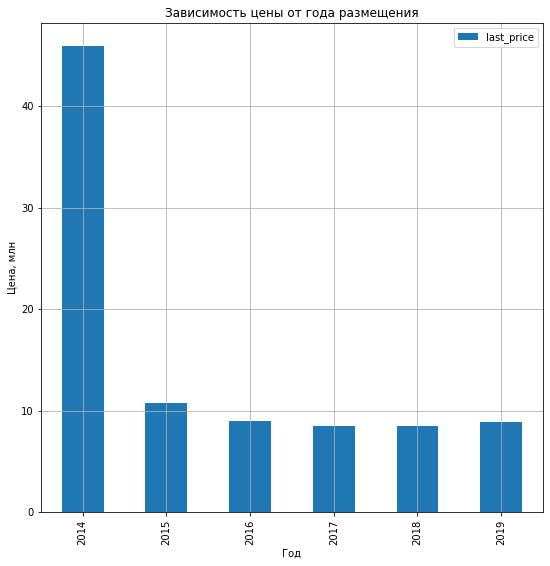

In [224]:
spb_centre.pivot_table(index= 'year_exposition', values = 'last_price', aggfunc = 'median').plot(kind = 'bar', grid = True, figsize = (9,9))
plt.title('Зависимость цены от года размещения')
plt.xlabel('Год')
plt.ylabel('Цена, млн')
plt.show()

В отличие от всеё выборки цена по годам довольно плавно возрастала.

## Общий вывод

Что необходимо помнить при определении рыночной стоимости квартиры:

* чем больше площадь, тем выше цена
* количество комнат и удалённость от центра практически не влияют на ценообразование
* цена квартир на первом и последних этажах более низкая
* самое популярное место по продаже квартир - Санкт-Петербург, после него идет посёлок Мурино, потом посёлок Шушары
* у центральной зоны радиус равен 8 км
* цены на квартиры в центре выше, чем по выборке в целом
* цена квартир упала с 2014 года по общей выборке, однако в центре СПб она плавно возрастала с 2014

Средняя квартира по всей выборке:
* площадь - 52 кв.м.
* цена - 4.64 млн рублей
* 2 комнаты
* высота потолков - 2.65 м

Средняя квартира в центре:
* площадь - 73.9 кв.м.
* цена - 8.57 млн рублей
* 3 комнаты
* высота потолков - 2,75 м